In [1]:

from IPython.display import display, Markdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load dataset
df = pd.read_csv('fake_job_postings.csv')

# Check the first few rows of the dataset
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [3]:
df.shape

(17880, 18)

### Data Cleaning and Preprocessing

In [4]:
# Checking null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# Pisahkan kolom numerik dan kategorikal
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [7]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [8]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [9]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [11]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

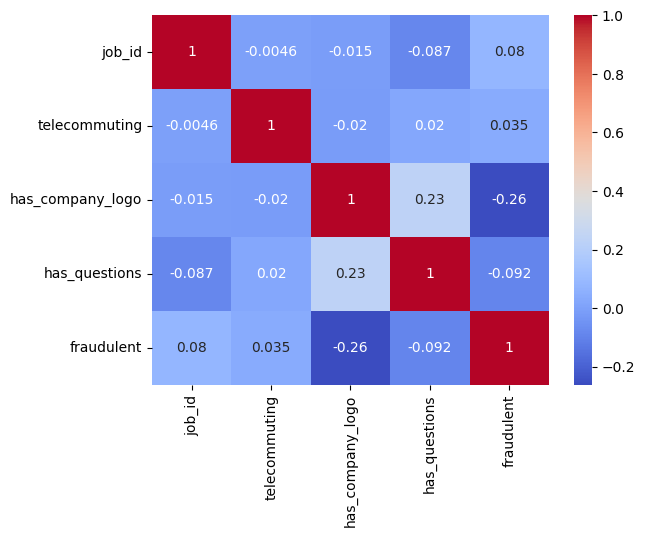

In [12]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [13]:
# drop kolom dari dataframe
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)


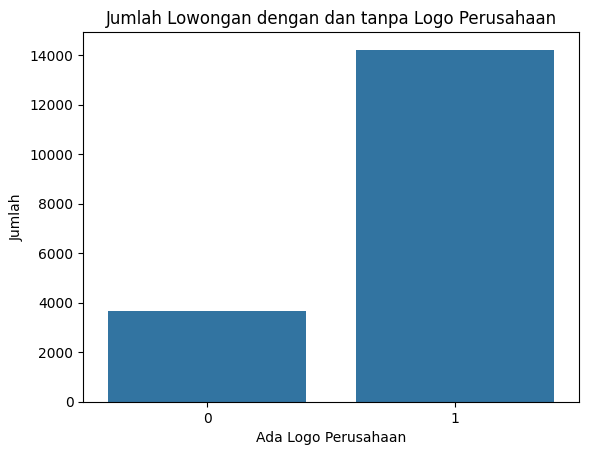

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='has_company_logo', data=df)
plt.title('Jumlah Lowongan dengan dan tanpa Logo Perusahaan')
plt.xlabel('Ada Logo Perusahaan')
plt.ylabel('Jumlah')
plt.show()

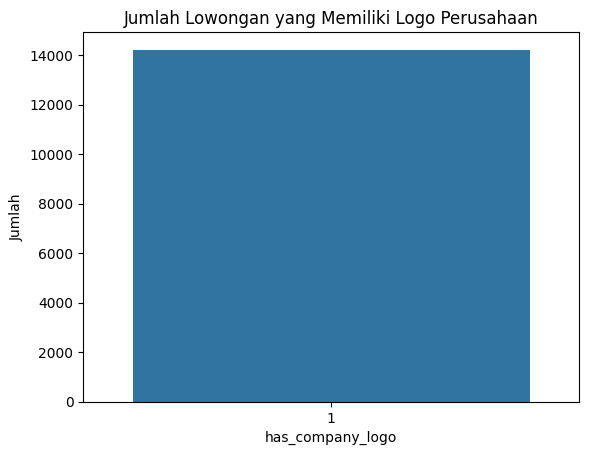

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter hanya yang memiliki logo
df_logo = df[df['has_company_logo'] > 0.0]

# Visualisasi jumlah
sns.countplot(x='has_company_logo', data=df_logo)
plt.title('Jumlah Lowongan yang Memiliki Logo Perusahaan')
plt.xlabel('has_company_logo')
plt.ylabel('Jumlah')
plt.show()

In [16]:
# ambil nama negara dari kolom location
df['country'] = df['location'].str.split(',').str[0]

In [17]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
has_company_logo           2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
country                   90
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\827408398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraudulent', palette='Set1')


<Axes: xlabel='fraudulent', ylabel='count'>

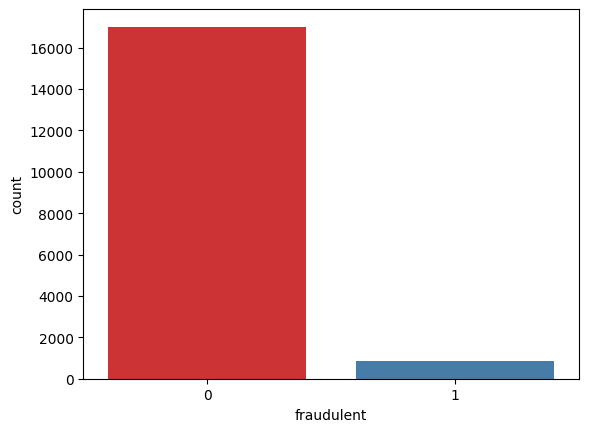

In [18]:
# membuat grafik batang (bar chart) 
sns.countplot(data=df, x='fraudulent', palette='Set1')



In [19]:
# memfilter dan menghitung jumlah baris data palsu
fake = df[df['fraudulent'] == 1]
print(fake.shape)

len(fake)
# atau
df['fraudulent'].value_counts()

(866, 17)


fraudulent
0    17014
1      866
Name: count, dtype: int64

In [20]:
# memfilter dan menghitung jumlah baris data yang valid (tidak fraud) 
real = df[df['fraudulent'] == 0]
real.shape


(17014, 17)

In [21]:
fake = fake.sample(17014, replace=True)


In [22]:
real.shape,fake.shape

((17014, 17), (17014, 17))

In [23]:
# menggabungkan dua DataFrame

df = pd.concat([fake, real], ignore_index=True)  # Menggabungkan fake dan real
df = df.reset_index(drop=True)  # Mengatur ulang index tanpa menambah kolom index lama
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,3176,Earn the Income You Deserve,"US, DC, Washington",NaN,NaN,NaN,Prepare yourself to learn about an exciting wa...,Professional mannerPositive outlookAbility to ...,"If you have a laptop, phone and a strong desir...",0,NaN,NaN,NaN,NaN,NaN,1,US
1,11761,Process Safety Engineer,"US, CA, Bakersfield",Oil & Energy,NaN,...,"We are a full-service engineering, project man...",Qualifications:Knowledge of Oil/Gas Processes ...,"* Clean, safe, enjoyable environment to work i...",1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1,US
2,6551,Customer Service Representative,"US, TX, Austin",CALL CENTER,26000-32000,As the industry’s largest supply contracting c...,Are you looking for a career in customer servi...,Dedicated people who enjoy helping othersHigh ...,"top hourly wage, medical benefits, 401(k) reti...",1,Full-time,Entry level,High School or equivalent,Logistics and Supply Chain,Customer Service,1,US
3,7663,Data Entry Office Support,"US, MI, Detroit",NaN,NaN,NaN,We are seeking individuals to be connected wit...,Home Office SuppliesComputer with internet acc...,NaN,0,NaN,Entry level,Some High School Coursework,NaN,Administrative,1,US
4,17777,Administrative Assistant,"US, TX, Houston",NaN,NaN,"Founded in 1993, our group has, in a few short...","Duties / Responsibilities:- Data entry, genera...",- Flexible Schedule- Minimum 2 years’ experien...,Compensation: 12.00 per hour as starting pay +...,1,Full-time,Entry level,Unspecified,Media Production,Administrative,1,US


C:\Users\hp\AppData\Local\Temp\ipykernel_1288\2546040383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='fraudulent', palette='Set1')


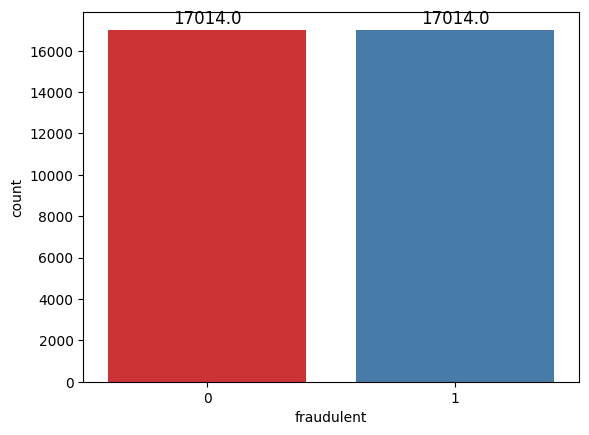

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat countplot
ax = sns.countplot(data=df, x='fraudulent', palette='Set1')

# Menambahkan nilai pada batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Menampilkan plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\695042420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='country', order=country, palette='rainbow')


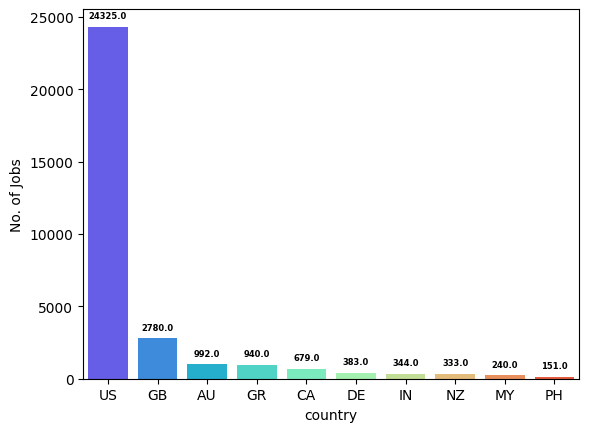

In [25]:
# 10 negara teratas berdasarkan jumlah pekerjaan ('country')

import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung 10 negara terbanyak
country = df['country'].value_counts().nlargest(10).index.tolist()

# Membuat countplot
ax = sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

# Menambahkan nilai di atas batang dengan teks kecil dan bold
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=6, color='black', weight='bold',  # Ukuran font kecil dan bold
                xytext=(0, 8), textcoords='offset points')

# Menampilkan plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\3225889867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='employment_type', palette='rainbow')


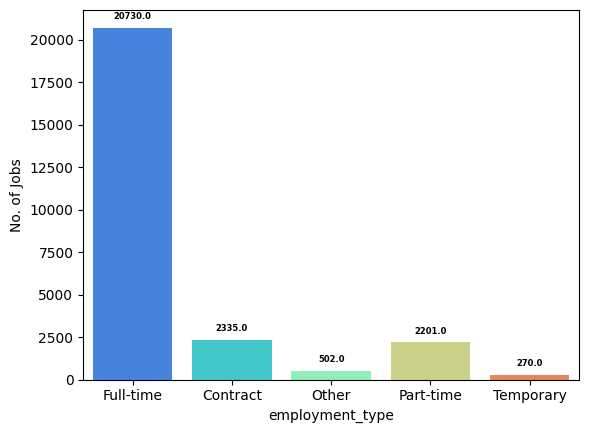

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat countplot untuk 'employment_type'
ax = sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

# Menambahkan nilai di atas batang dengan teks kecil dan bold
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=6, color='black', weight='bold',  # Ukuran font kecil dan bold
                xytext=(0, 8), textcoords='offset points')

# Menampilkan plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\4114445653.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='rainbow')


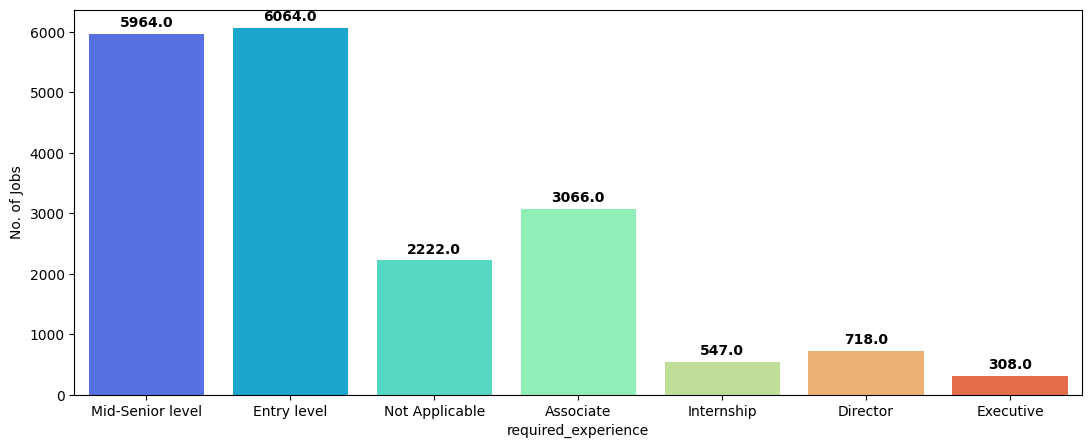

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur ukuran grafik
plt.figure(figsize=(13, 5))

# Membuat countplot untuk 'required_experience'
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

# Menambahkan nilai di atas batang dengan teks kecil dan bold
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', weight='bold',  # Ukuran font kecil dan bold
                xytext=(0, 8), textcoords='offset points')

# Menampilkan plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\1961976643.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_education', order=country, palette='rainbow')


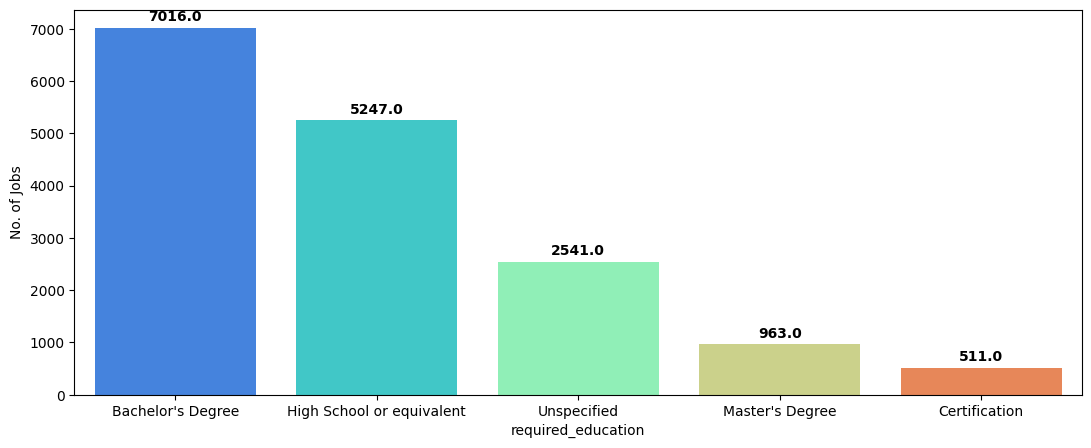

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur ukuran grafik
plt.figure(figsize=(13, 5))

# Mengambil 5 kategori pendidikan teratas berdasarkan jumlah pekerjaan
country = df['required_education'].value_counts().nlargest(5).index.tolist()

# Membuat countplot untuk 'required_education'
ax = sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

# Menambahkan nilai di atas batang dengan teks kecil dan bold
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', weight='bold',  # Ukuran font kecil dan bold
                xytext=(0, 8), textcoords='offset points')

# Menampilkan plot
plt.show()


In [29]:
# Hapus nilai yang hilang atau NaN

df.fillna(' ',inplace=True)
df.isnull().sum()


job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [30]:
# Membuat kolom 'combined_text' dengan menggabungkan beberapa kolom teks
df['combined_text'] = df[['title', 'location', 'salary_range', 'company_profile', 'description', 
                          'requirements', 'benefits', 'employment_type', 'required_experience', 
                          'required_education', 'industry', 'function', 'department']].apply(lambda x: ' '.join(x), axis=1)

# Menghapus kolom-kolom yang sudah digabungkan
df.drop(columns=['title', 'location', 'salary_range', 'company_profile', 'description', 
                 'requirements', 'benefits', 'employment_type', 'required_experience', 
                 'required_education', 'industry', 'function', 'department'], inplace=True)

# Menghapus kolom 'country'
df.drop('country', axis=1, inplace=True)
df.head(2)

,job_id,has_company_logo,fraudulent,combined_text
0,3176,0,1,"Earn the Income You Deserve US, DC, Washington..."
1,11761,1,1,"Process Safety Engineer US, CA, Bakersfield ..."


In [31]:
# Memisahkan data penipuan dan bukan penipuan berdasarkan 'fraudulent' dan memilih 'combined_text'
fake = df[df['fraudulent'] == 1]['combined_text'].copy()
real = df[df['fraudulent'] == 0]['combined_text'].copy()

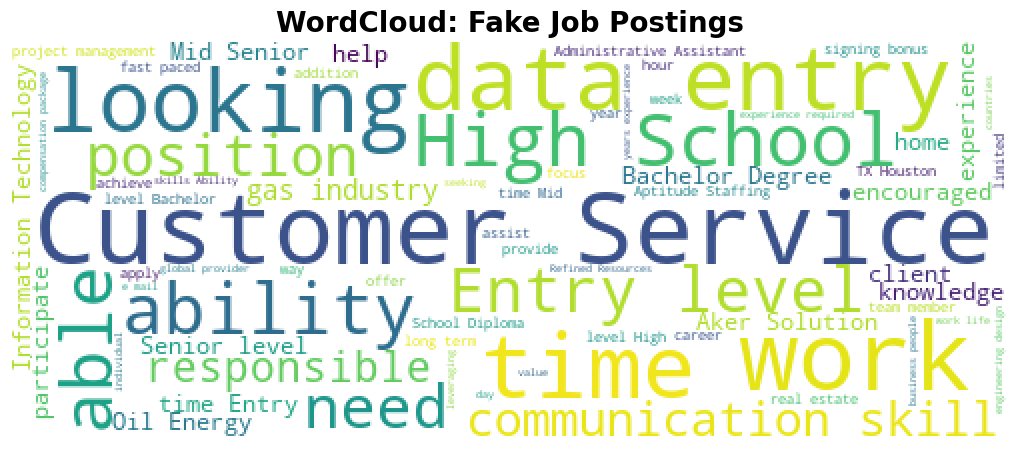

In [32]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Memuat model bahasa Inggris
nlp = spacy.load('en_core_web_sm')

# Mengambil stopwords dari model spaCy
STOPWORDS = nlp.Defaults.stop_words

# Membuat wordcloud untuk teks 'fake'
wordcloud = WordCloud(min_font_size=4, width=500, height=200, background_color='white', stopwords=STOPWORDS).generate(' '.join(fake))

# Menampilkan wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")  # Menghilangkan axis

# Menambahkan judul pada wordcloud
plt.title("WordCloud: Fake Job Postings", fontsize=20, fontweight='bold')

# Mengatur layout agar tidak terpotong
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()

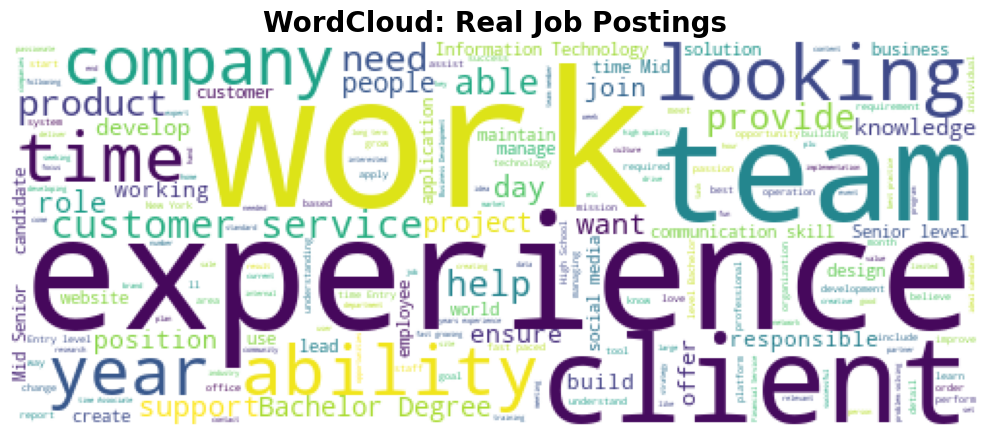

In [33]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Memuat model bahasa Inggris
nlp = spacy.load('en_core_web_sm')

# Mengambil stopwords dari model spaCy
STOPWORDS = nlp.Defaults.stop_words

# Membuat wordcloud untuk teks 'real'
wordcloud = WordCloud(min_font_size=4, width=500, height=200, background_color='white', stopwords=STOPWORDS).generate(' '.join(real))

# Menampilkan wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")  # Menghilangkan axis

# Menambahkan judul pada wordcloud
plt.title("WordCloud: Real Job Postings", fontsize=20, fontweight='bold')

# Mengatur layout agar tidak terpotong
plt.tight_layout()

# Menampilkan wordcloud
plt.show()


### Data Cleaning

In [34]:
import re
import nltk

# Pastikan sudah mengunduh stopwords dan word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Ambil stopwords hanya sekali untuk efisiensi
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    # Pastikan text bukan NaN dan tipe data adalah string
    if isinstance(text, str):
        text = text.lower()  # Ubah teks menjadi huruf kecil
        text = re.sub(r'<.*?>', '', text)  # Hapus tag HTML
        text = re.sub(r'http\S+', '', text)  # Hapus URL
        text = re.sub(r'[^a-zA-Z0-9]', ' ', text)  # Hapus karakter non-alfanumerik
        tokens = nltk.word_tokenize(text)  # Tokenisasi teks
        tokens = [word for word in tokens if word not in stop_words]  # Hapus stopwords
        cleaned_text = ' '.join(tokens)  # Gabungkan kembali token yang tersisa
        return cleaned_text
    return ''  # Kembalikan string kosong jika teks tidak valid

# Terapkan fungsi clean_text pada kolom 'combined_text'
df['combined_text'] = df['combined_text'].apply(clean_text)

# Menyimpan DataFrame yang sudah dibersihkan ke dalam file CSV
df.to_csv("combined_text.csv", index=False)

# Menampilkan pesan bahwa teks telah dibersihkan dan disimpan
print("Teks berhasil dibersihkan dan disimpan ke 'combined_text.csv'")

# Menampilkan 5 baris pertama untuk memverifikasi hasil
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Teks berhasil dibersihkan dan disimpan ke 'combined_text.csv'
   job_id  has_company_logo  fraudulent  \
0   17816                 0           1   
1   17734                 0           1   
2    2052                 1           1   
3    6975                 0           1   
4    2970                 0           1   

                                       combined_text  
0  urgent cash jobs part time full time us ca los...  
1  payroll processor entry clerk position 50 hr u...  
2  maintenance supervisor us oh cincinnati bradle...  
3  manager project management organization engine...  
4  strategic sourcing engineer 2053 us nc thomasv...  


### Data Sudah Bersih

In [34]:
# Load dataset
df = pd.read_csv('combined_text.csv')
df.head(2)

,job_id,has_company_logo,fraudulent,combined_text
0,17816,0,1,urgent cash jobs part time full time us ca los...
1,17734,0,1,payroll processor entry clerk position 50 hr u...


### Normalisasi Data
Menggunakan model bahasa Inggris dari spaCy (en_core_web_sm) untuk pra-pemrosesan teks. Fungsi yang disebut normalize_text melakukan tokenisasi pada teks input, melematisasi setiap token, dan kemudian mengembalikan teks yang sudah dinormalisasi.

In [35]:
import spacy
from tqdm import tqdm

# Muat model bahasa Inggris, hanya aktifkan yang dibutuhkan (tanpa parser dan NER untuk kecepatan)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Pastikan tidak ada nilai NaN di kolom teks
texts = df['combined_text'].fillna("").tolist()

# Gunakan tqdm untuk melihat progress bar
normalized_texts = []

# Proses dalam batch untuk efisiensi
for doc in tqdm(nlp.pipe(texts, batch_size=50), total=len(texts), desc="Lemmatizing"):
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    normalized_texts.append(" ".join(lemmas))

# Simpan kembali ke DataFrame
df['combined_text'] = normalized_texts

# Tampilkan hasil
print(df.head())

df.to_csv("clean_lemma.csv", index=False)
print("Data berhasil dibersihkan dan disimpan ke 'clean_lemma.csv'")

Lemmatizing: 100%|██████████| 34028/34028 [08:42<00:00, 65.11it/s] 


   job_id  has_company_logo  fraudulent  \
0   17816                 0           1   
1   17734                 0           1   
2    2052                 1           1   
3    6975                 0           1   
4    2970                 0           1   

                                       combined_text  
0  urgent cash job part time full time we can los...  
1  payroll processor entry clerk position 50 hr u...  
2  maintenance supervisor we oh cincinnati bradle...  
3  manager project management organization engine...  
4  strategic source engineer 2053 us nc thomasvil...  
Data berhasil dibersihkan dan disimpan ke 'clean_lemma.csv'


In [36]:
# Load dataset
df = pd.read_csv('clean_lemma.csv')
df.head(2)

,job_id,has_company_logo,fraudulent,combined_text
0,17816,0,1,urgent cash job part time full time we can los...
1,17734,0,1,payroll processor entry clerk position 50 hr u...


### Ekstraksi Fitur
Lakukan pra-pemrosesan pada data teks dengan menerapkan penandaan Part-of-Speech (POS) dan CountVectorizer. Proses ini menghasilkan fitur tambahan berdasarkan struktur gramatikal dan menggabungkannya dengan fitur teks asli. Terakhir, simpan vectorizer untuk memastikan pemrosesan yang konsisten.

In [38]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
import pickle

# Kolom teks yang akan diproses
text_columns = ['combined_text']

# Menggunakan NLTK untuk penandaan Part-of-Speech (POS) pada teks
df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

# Menyiapkan data untuk pelatihan
X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

# Membuat CountVectorizer untuk ekstraksi fitur unigram dan bigram untuk teks
vectorizer_text = CountVectorizer(ngram_range=(1, 2))

# Membuat CountVectorizer untuk ekstraksi fitur unigram dan bigram untuk POS
vectorizer_pos = CountVectorizer(ngram_range=(1, 2))

# Melakukan transformasi untuk teks
text_matrix_train = vectorizer_text.fit_transform(X_train['combined_text'])

# Melakukan transformasi untuk POS
pos_matrix_train = vectorizer_pos.fit_transform(X_train['pos_features'])

# Menggabungkan fitur teks dan fitur POS
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

# Menyimpan CountVectorizer yang telah dilatih ke dalam file untuk digunakan di kemudian hari
with open('countvectorizer_text.pkl', 'wb') as file:
    pickle.dump(vectorizer_text, file)
with open('countvectorizer_pos.pkl', 'wb') as file:
    pickle.dump(vectorizer_pos, file)

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\2830747522.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x[0])), axis=1)


### Permodelan

In [40]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
import nltk
import pandas as pd
import spacy

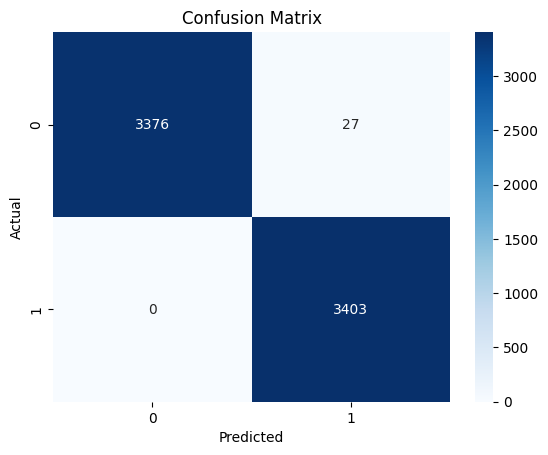

Cross-validation scores: [0.99632691 0.99706152 0.99797943 0.99467303 0.99485672]
Rata-rata cross-validation score: 0.996179522835057
Akurasi data uji: 0.9960329121363503
Precision data uji: 0.9921282798833819
Recall data uji: 1.0
F1 Score data uji: 0.9960485877359871
Model Logistic Regression telah disimpan sebagai 'logistic_model.pkl'


In [41]:
# Model pelatihan
X_train, X_test, y_train, y_test = train_test_split(combined_matrix_train, y_train, test_size=0.2, random_state=42)

# Membuat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print('Cross-validation scores:', cv_scores)
print('Rata-rata cross-validation score:', cv_scores.mean())
print('Akurasi data uji:', accuracy)
print('Precision data uji:', precision)
print('Recall data uji:', recall)
print('F1 Score data uji:', f1)

# Menyimpan model Logistic Regression yang telah dilatih
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model Logistic Regression telah disimpan sebagai 'logistic_model.pkl'")

### Model dan CountVectorizer untuk Prediksi

In [48]:
print(type(X_test))

<class 'scipy.sparse._csr.csr_matrix'>


### BISA

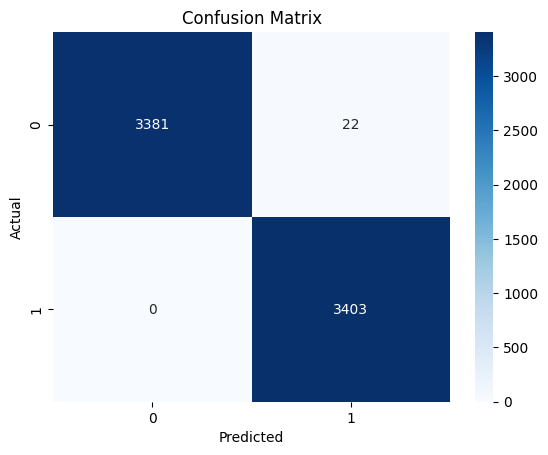

Cross-validation scores: [0.99651056 0.99853076 0.99779574 0.99504041 0.9952241 ]
Rata-rata cross-validation score: 0.9966203144260722
Akurasi data uji: 0.9967675580370261
Precision data uji: 0.9935766423357664
Recall data uji: 1.0
F1 Score data uji: 0.9967779730521382
Model Logistic Regression telah disimpan sebagai 'logistic_model.pkl'
Model Logistic Regression telah dimuat.
Akurasi model yang dimuat: 0.9967675580370261


In [43]:
# Model pelatihan
X_train, X_test, y_train, y_test = train_test_split(combined_matrix_train, y_train, test_size=0.2, random_state=42)

# Membuat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi
print('Cross-validation scores:', cv_scores)
print('Rata-rata cross-validation score:', cv_scores.mean())
print('Akurasi data uji:', accuracy)
print('Precision data uji:', precision)
print('Recall data uji:', recall)
print('F1 Score data uji:', f1)

# Menyimpan model Logistic Regression yang telah dilatih
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model Logistic Regression telah disimpan sebagai 'logistic_model.pkl'")

# Memuat model Logistic Regression yang telah disimpan
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model Logistic Regression telah dimuat.")

# Menggunakan model yang dimuat untuk prediksi baru atau evaluasi lebih lanjut
y_pred_loaded = loaded_model.predict(X_test)

# Evaluasi model yang dimuat
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print('Akurasi model yang dimuat:', accuracy_loaded)

**Analisis Confusion Matrix**


Confusion matrix menunjukkan hasil klasifikasi model Logistic Regression terhadap data uji sebagai berikut:

|                                 | Prediksi Negatif         | Prediksi Positif         |
| ------------------------------- | ------------------------ | ------------------------ |
| **Kelas Negatif** (Iklan Asli)  | **3381 (True Negative)** | **22 (False Positive)**  |
| **Kelas Positif** (Iklan Palsu) | **0 (False Negative)**   | **3403 (True Positive)** |


Dari matrix tersebut dapat disimpulkan bahwa:
True Positive (TP) = 3403
Artinya, 3403 iklan palsu berhasil terdeteksi dengan benar sebagai palsu oleh model.


 - True Negative (TN) = 3381
=> Sebanyak 3381 iklan asli juga berhasil dikenali dengan benar oleh model.
- False Positive (FP) = 22
=> Sebanyak 22 iklan asli diklasifikasikan keliru sebagai iklan palsu. Meskipun kesalahan ini terjadi, jumlahnya sangat kecil dibanding total data.
- False Negative (FN) = 0
=> Tidak ada iklan palsu yang lolos sebagai iklan asli. Ini merupakan keunggulan penting karena menunjukkan model tidak melewatkan satu pun kasus penipuan.
- Rata-rata skor cross-validation (5 fold): 99.66%
- Akurasi pada data uji: 99.67%
- Precision: 99.36%
- Recall: 100%
- F1 Score: 99.68%
- Nilai recall yang sempurna (100%) menandakan bahwa model berhasil mengenali semua iklan palsu tanpa ada yang terlewat (tidak terjadi false negative), yang sangat penting untuk mencegah potensi korban penipuan. Sementara itu, nilai precision yang tinggi menunjukkan bahwa sebagian besar iklan yang diklasifikasikan sebagai palsu memang benar palsu (false positive sangat rendah), sehingga meminimalkan kesalahan deteksi terhadap iklan asli.
- Kesimpulan = Model memiliki performa yang sangat baik dan aman digunakan sebagai sistem deteksi otomatis. Tidak ada kasus iklan palsu yang gagal terdeteksi (Recall = 100%), dan tingkat kesalahan dalam mendeteksi iklan asli sangat kecil (Precision tetap tinggi = 99.36%). Hal ini sangat penting dalam konteks keamanan pengguna terhadap potensi penipuan.